In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 


In [75]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
churn_df = churn_data.copy()
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [77]:
# Определение категориальных признаков
churn_df['Geography'] = churn_df['Geography'].astype('category')
churn_df['Gender'] = churn_df['Gender'].astype('category')
churn_df['HasCrCard'] = churn_df['HasCrCard'].astype('category')
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].astype('category')

churn_df['Exited'] = churn_df['Exited'].apply(lambda x: 'лояльный' if x == 0 else 'ушедший').astype('category')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(6), object(1)
memory usage: 752.7+ KB


#### 9.1. Каково соотношение ушедших и лояльных клиентов? 

Покажите это на графике и дайте комментарий по соотношению.

In [80]:
exited_data = churn_df.groupby(by='Exited',as_index=False, observed=True).nunique()

fig = px.pie(
    exited_data,
    values='CustomerId',
    names='Exited',
    title= 'Соотношение ушедших и лояльных клиентов',
    height=400,
    width=500
    );

fig.update_traces(textposition='outside', 
                  textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()

Из 10 тысяч рассматриваемых клиентов банка **более 20%** или 2 037 клиентов, отказались от услуг банка. 

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 

Опишите распределение и сделайте выводы.

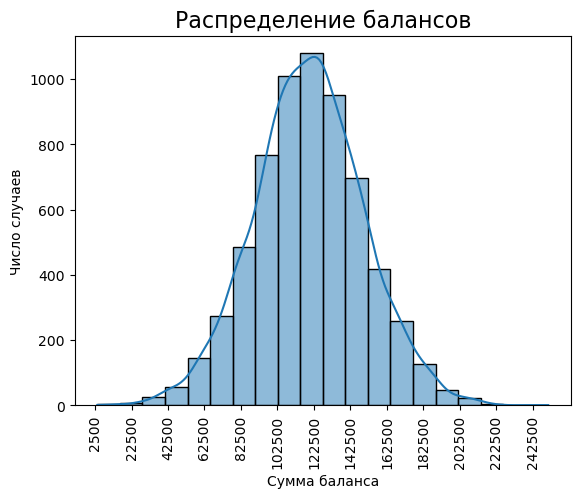

In [ ]:
mask = churn_df['Balance'] > 2500
ower_balance = churn_df[mask]

plt_balance = sns.histplot(
                data=ower_balance,
                x='Balance',
                bins=20,
                kde=True
            );
plt_balance.set_title('Распределение балансов', fontsize=16)
plt_balance.set_xlabel('Сумма баланса')
plt_balance.set_ylabel('Число случаев')
plt_balance.set_xticks(range(2500, 250000, 20000))
plt_balance.xaxis.set_tick_params(rotation=90)


Если не учитывать вклады меньше 2500 долларов, то **наиболее часто** встречающися (более 1000 случаев) являются **вклады** на сумму **122 500** долларов. **Наибольшее** количество составляют балансы **от 82 500 до 162 500 долларов**. 

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 

Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

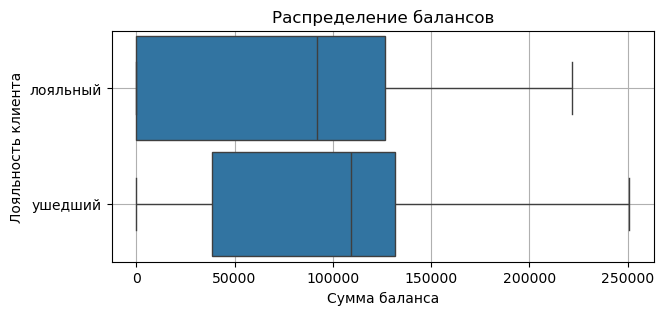

In [155]:
fig = plt.figure(figsize=(7, 3))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение балансов');
boxplot.set_xlabel('Сумма баланса');
boxplot.set_ylabel('Лояльность клиента');
boxplot.grid()


Суммы на балансах ушедших более сконцентрированы, а так же характеризуются более крупными суммами, на что указывает правое положение медианы и более джлинный правый ус.
Таким образом в категорию ушедших попадают более крупные клиенты.
